In [1]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt

cols=plt.rcParams['axes.prop_cycle'].by_key()['color']

import sys
sys.path.append('functions/')

import importlib
import myfuncs as myf
import Hf_Q as HF_Q

importlib.reload(myf)
importlib.reload(HF_Q)

<module 'Hf_Q' from '/Users/pietromariabonetti/Documents/postdoc/Lieb_lattice/scripts/functions/Hf_Q.py'>

In [54]:
pars = dict(t=1,U=9,J=0,t_pxpy=0,t_pp=0,t_dd=0,J_pxpy=0)
Nk = 20
#remember U=8, t_pxpy=0.5, noly px-py
OBJ = HF_Q.HF_qQ(Nk,pars)
OBJ.klin/np.pi

print('U=%.3f' %OBJ.pars['U'])

par_ini = dict(mu=0,Dd=0,Dpx=0,Dpy=0.2)
T0=0.01
numpars=dict(T=T0,mix=0.75,Nitermax = 2000,tol = 1e-4,vb=True,Hartree_term=True,symm2=False,symm=False,
             LIMQ=None,vb_findroot=False)
np.set_printoptions(suppress=True,precision=6)

#0.6283185307179592 -2.8274333882308142
mud,mupx,mupy,Dd,Dpx,Dpy,F2,mu,qqx,qqy = OBJ.SC_loop_findQ(n_wanted=0.5,Qx=np.pi,Qy=0,
                                                           par_ini=None,**numpars)
data_sv2 = dict(mud=mud,mupx=mupx,mupy=mupy,Dd=Dd,Dpx=Dpx,Dpy=Dpy,F=F2,mu=mu,Qx=qqx,Qy=qqy)

# mud,mupx,mupy,Dd,Dpx,Dpy,F1,mu,qqx,qqy = OBJ.SC_loop_findQ(n_wanted=0.5,Qx=np.pi,Qy=None,Qdiag=False,par_ini=None,**numpars)
# data_sv1 = dict(mud=mud,mupx=mupx,mupy=mupy,Dd=Dd,Dpx=Dpx,Dpy=Dpy,F=F1,mu=mu,Qx=qqx,Qy=qqy)

# if (F1<F2):
#     data_sv = data_sv1

# else:
#     data_sv = data_sv2
data_sv = data_sv2

U=9.000
random initial conditions
0 1.29220 : 0.0061  0.5000|-2.4208|[1.000,0.000]| dmus -2.4440  -2.4172 -1.8888 |(0.9335, -0.0303) (1.6098, -2.3298) (0.3002, -1.4297)
1 0.94696 : 0.1641  0.5000|-2.1570|[1.000,0.000]| dmus -2.5075  -2.3950 -1.8475 |(0.9867, -0.0332) (1.7856, -2.3290) (0.3309, -1.3519)
2 0.80042 : 0.2738  0.5000|-1.9633|[1.000,0.000]| dmus -2.5117  -2.4453 -1.7931 |(1.0251, -0.0374) (1.9634, -2.3283) (0.3747, -1.2283)
3 0.76608 : 0.3415  0.5000|-1.8230|[1.000,0.000]| dmus -2.4868  -2.5196 -1.7437 |(1.0555, -0.0470) (2.1291, -2.3211) (0.4400, -1.0984)
4 0.72349 : 0.3725  0.5000|-1.7238|[1.000,0.000]| dmus -2.4483  -2.6001 -1.7017 |(1.0833, -0.0621) (2.2780, -2.3074) (0.5272, -0.9776)
5 0.67386 : 0.3754  0.5000|-1.6554|[1.000,0.000]| dmus -2.4039  -2.6790 -1.6672 |(1.1117, -0.0815) (2.4093, -2.2889) (0.6323, -0.8699)
6 0.61885 : 0.3584  0.5000|-1.6102|[1.000,0.000]| dmus -2.3574  -2.7517 -1.6409 |(1.1420, -0.1037) (2.5227, -2.2675) (0.7491, -0.7754)
7 0.55920 : 0.3269  0

In [24]:
np.set_printoptions(suppress=True,precision=5)
importlib.reload(HF_Q)
pars = dict(t=1,U=7.5,J=0,t_pxpy=0,t_pp=0,t_dd=0,J_pxpy=0)
Nk = 20
OBJ = HF_Q.HF_qQ(Nk,pars)
#
dict_name='data_sv_U9.0_QSL_pars.npy'
data_sv = np.load(dict_name,allow_pickle='TRUE').item()
data2=data_sv.copy()
#
phase=np.exp(-1j*np.angle(data_sv['Dd']))
data2['Dd']*=phase
data2['Dpx']*=phase
data2['Dpy']*=phase


Q0=np.array([data_sv['Qx'],data_sv['Qy']])
print(Q0,Q0/np.pi)


_,_,Hk=OBJ.make_H_Q2(data2,Q=Q0)
U = np.array([[1-1j,-1-1j],[1-1j,1+1j]]) / 2
Ur = np.kron(U,np.identity(3))
Hk = np.einsum('ba,xybc,cd->xyad',Ur,Hk,np.conj(Ur))

sigma_y = 1j*np.array([[0,-1],[1,0]])
SM = np.kron(sigma_y,np.diag([0,1,0]))
theta=np.pi
Ur = sp.linalg.expm(-1j*theta/2*SM)
Hk = np.einsum('ba,xybc,cd->xyad',np.conj(Ur),Hk,Ur)

'''
theta=np.angle(data2['Dpx'])
sigma_y = 1j*np.array([[0,-1],[1,0]])
SM = np.kron(sigma_y,np.diag([0,1,-1]))
Ur = sp.linalg.expm(-1j*theta/2*SM)
Hk = np.einsum('ba,xybc,cd->xyad',np.conj(Ur),Hk,Ur)
'''

Ek,phik = np.linalg.eigh(Hk)

_,_,chitau,Qtau,Pv,Qv=OBJ.calc_chi_SL(Ek,phik,0.01)
print(chitau.real)
#print(abs(Qtau),np.angle(Qtau))
print(Qtau) 
print('====')
print(abs(Pv[:4]),np.angle(Pv[:4]))
print(abs(Pv[4:]),np.angle(Pv[4:]))
print(Pv[:4])
print(Pv[4:])
print('====')
print(abs(Qv[:4]),np.angle(Qv[:4]))
print(abs(Qv[4:]),np.angle(Qv[4:]))
print(Qv[:4])
print(Qv[4:])
print('==================================')
print( abs(Qv[0]/Pv[0]), 1/np.tan(data_sv['Qx']/4) )
print( abs(Pv[2]/Pv[0]), 1/np.cos(data_sv['Qx']/4) )

[3.14159 0.     ] [1. 0.]
[0.3824  0.58292 0.38348]
[0.00001+0.j 0.00068-0.j 0.00013+0.j]
====
[0.20497 0.20497 0.27966 0.27966] [ 3.14159 -3.14159  0.      -0.     ]
[0.20483 0.20483 0.27966 0.27966] [ 0. -0. -0.  0.]
[-0.20497+0.j -0.20497-0.j  0.27966+0.j  0.27966-0.j]
[0.20483+0.j 0.20483-0.j 0.27966-0.j 0.27966+0.j]
====
[0.19221 0.19221 0.00001 0.00001] [ 0.      -3.14159  0.      -3.14159]
[0.19199 0.19199 0.00001 0.00001] [-0.       3.14159  0.      -3.14159]
[ 0.19221+0.j -0.19221-0.j  0.00001+0.j -0.00001-0.j]
[ 0.19199-0.j -0.19199+0.j  0.00001+0.j -0.00001-0.j]
0.9377632767208995 1.0000000000000002
1.3644145212901937 1.414213562373095


In [55]:
import os
#new_dir='../data/manual_runs/run_U_%.3f' %OBJ.pars['U']
#os.makedirs(new_dir, exist_ok=True)
#dict_name=new_dir+'/data_dict.npy'
#np.save(dict_name,data_sv)
dict_name='data_sv_U9.0_QSL_pars.npy'
np.save(dict_name,data_sv)
read_dictionary = np.load(dict_name,allow_pickle='TRUE').item()
print(OBJ.pars["U"])
print(read_dictionary['Qx']/np.pi)
read_dictionary

9
1.0


{'mud': -2.2634728864337124,
 'mupx': -2.7750269240287637,
 'mupy': -1.8466624424355702,
 'Dd': (1.6836956768109526+0.35534479330864355j),
 'Dpx': (-2.5653191435768483-0.5477332294603003j),
 'Dpy': (1.6882517971157374+0.3574308449324339j),
 'F': -1.9308473435528757,
 'mu': -0.04505515098571777,
 'Qx': 3.141592653589793,
 'Qy': 0.0}

In [3]:
data_sv = np.load('../data/manual_runs/run_U_7.000/data_dict.npy',allow_pickle='TRUE').item()
print(data_sv['Qx']/np.pi)
data_sv

0.7312451848983766


{'mud': -1.9258264521826831,
 'mupx': -2.1294221915654994,
 'mupy': -1.6157632933275499,
 'Dd': (0.7872107574329443-0.10533036245940791j),
 'Dpx': (-1.78597046221846+0.27199619208978015j),
 'Dpy': (1.2649448553966802-0.18380203929306713j),
 'F': -2.035824237802469,
 'mu': -0.14033913612365723,
 'Qx': 2.29727450084965,
 'Qy': 0.0}

In [94]:
OBJ = HF_Q.HF_qQ(Nk,pars)
Qs=np.linspace(0,1,201)
#Qs=OBJ.klin/np.pi
#scp_pars=dict(Dd=Dd,Dpx=Dpx,Dpy=Dpy,mud=mud,mupx=mupx,mupy=mupy)
Qx_eq1=np.zeros(Qs.shape)
Qy_eq1=np.zeros(Qs.shape)
Qx_eq2=np.zeros(Qs.shape)
Qy_eq2=np.zeros(Qs.shape)

for cnt,qx in enumerate(Qs):
    vect=OBJ.Q_eq(Q=[qx*np.pi,data_sv['Qy']],sc_pars=data_sv,T=T0).real
    Qx_eq1[cnt]=vect[0]
    Qy_eq1[cnt]=vect[1]
    vect=OBJ.Q_eq(Q=[data_sv['Qx'],qx*np.pi],sc_pars=data_sv,T=T0).real
    Qx_eq2[cnt]=vect[0]
    Qy_eq2[cnt]=vect[1]

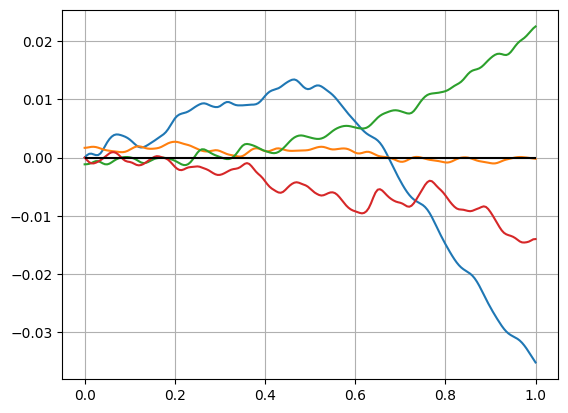

In [95]:
plt.plot(Qs,Qx_eq1,'-')
plt.plot(Qs,Qy_eq1,'-')
plt.plot(Qs,Qx_eq2,'-')
plt.plot(Qs,Qy_eq2,'-')
plt.hlines(0,Qs[0],Qs[-1],color='black')
plt.grid()

4.5
0.7753082275390626


{'mud': -1.8667979575560465,
 'mupx': -1.3676252145024763,
 'mupy': -1.3484183053780434,
 'Dd': (0.07445952940650032+0.01990508102425865j),
 'Dpx': (0.32165384261270796+0.08598692269478693j),
 'Dpy': (-0.07636829313188498-0.020415346089215275j),
 'F': -2.366993953977506,
 'mu': -0.40261149406433105,
 'Qx': 2.4357026319044426,
 'Qy': 0.0}

-1.9073486328125e-06


{'mud': -2.0831737860026993,
 'mupx': -2.095852812547588,
 'mupy': -2.0958526937023865,
 'Dd': (0.5479496268646267+1.2642991004021154j),
 'Dpx': (-1.1511240402963543+1.4901981983954409j),
 'Dpy': (1.874506265352079+0.17890361961880896j),
 'F': -1.9640273565558881,
 'mu': -0.09161829948425293,
 'Qx': -5.992112452678286e-06,
 'Qy': 0.0}

In [310]:
abs(-2.0196227940081455+0.857548382480395j)

2.1941434452587663

In [51]:
scp = dict(mud=0,mup=0,Dd=0,Dpx=0,Dpy=0)

Ddi = abs(OBJ.random_complex(1))
Dpxi = abs(OBJ.random_complex(1))
Dpyi = abs(OBJ.random_complex(1))

Ddi, Dpxi, Dpyi = pars['U']/4,pars['U']/4,pars['U']/4
#Ddi, Dpxi, Dpyi = 0,0,0.1

par_ini = dict(mu=0,Delta_d=0j,Delta_px=0.5,Delta_py=0)
T0=0.01
numpars=dict(T=T0,mix=0.75,Nitermax = 30000,tol = 5e-4,vb=True,Hartree_term=True,symm2=False)
np.set_printoptions(suppress=True,precision=6)
#mud,mupx,mupy,Dd,Dpx,Dpy,F,mu = OBJ.SC_loop(n_wanted=0.5,Q=[0,0],par_ini=None,**numpars,Hartree_term=True)
mud,mupx,mupy,Dd,Dpx,Dpy,F,mu,qqx,qqy = OBJ.SC_loop_findQ(n_wanted=0.5,Qx=np.pi,Qy=None,par_ini=par_ini,**numpars)


_='''
filename=open('./output.txt','a+')
print(F,qqx,qqy,mu,mud,mupx,mupy,abs(Dd),abs(Dpx),abs(Dpy),np.angle(Dd),np.angle(Dpx),np.angle(Dpy),file=filename)
filename.close()
'''

0 2.01325 : -0.5792  0.4987|-5.9612|[1.000,0.000]| dmus -3.3133  -2.2887 -2.1781 |(0.8135, 1.9572) (0.6454, 1.0849) (0.5041, 1.2994)
1 1.39023 : -0.1629  0.4995|-5.2533|[1.000,0.108]| dmus -3.1935  -2.3557 -2.2426 |(0.7438, 1.9511) (0.6801, 1.0930) (0.4986, 1.3147)
2 1.02398 : 0.1502  0.5021|-4.7738|[1.000,0.000]| dmus -3.1485  -2.4076 -2.2774 |(0.6880, 1.9460) (0.7096, 1.0987) (0.4811, 1.3291)
3 0.80877 : 0.3767  0.4977|-4.2656|[1.000,0.908]| dmus -3.0230  -2.3612 -2.3791 |(0.6485, 1.9972) (0.7011, 1.0287) (0.6534, 1.2069)
4 0.60301 : 0.5521  0.4998|-4.0253|[1.000,0.905]| dmus -3.0278  -2.3939 -2.3755 |(0.6118, 2.0038) (0.7167, 1.0200) (0.6640, 1.1971)
5 0.45111 : 0.6808  0.4999|-3.8184|[1.000,0.902]| dmus -3.0204  -2.4036 -2.3744 |(0.5787, 2.0103) (0.7275, 1.0117) (0.6753, 1.1874)
6 0.41774 : 0.7759  0.5003|-3.7188|[1.000,0.000]| dmus -3.0793  -2.4913 -2.2344 |(0.5458, 1.9708) (0.7838, 1.0584) (0.4874, 1.2643)
7 0.29740 : 0.8379  0.5000|-3.5886|[1.000,0.000]| dmus -3.0623  -2.4754 -2

In [5]:
Qx,Qy=OBJ.gen_Q_path()
i1=0
i2=OBJ.Nk//2+1
for cnt,(qx,qy) in enumerate(zip(Qx[i1:i2],Qy[i1:i2])):
    print(cnt,'%.2f %.2f'%(qx/np.pi,qy/np.pi))

0 0.00 0.00
1 0.05 0.00
2 0.10 0.00
3 0.15 0.00
4 0.20 0.00
5 0.25 0.00
6 0.30 0.00
7 0.35 0.00
8 0.40 0.00
9 0.45 0.00
10 0.50 0.00
11 0.55 0.00
12 0.60 0.00
13 0.65 0.00
14 0.70 0.00
15 0.75 0.00
16 0.80 0.00
17 0.85 0.00
18 0.90 0.00
19 0.95 0.00
20 1.00 0.00


In [ ]:
par_ini=dict(mu=0,Delta_d=0,Delta_px=0,Delta_py=OBJ.random_complex(1))
mud,mupx,mupy,Dd,Dpx,Dpy,F,mu,Qx,Qy = OBJ.SC_loop_findQ(n_wanted=0.5,Qy=np.pi,par_ini=None,**numpars,Hartree_term=True)

0 2.82897 : -0.3765  0.5000|-6.5007|[0.000,1.000]| dmus -3.6845  -2.4239 -3.6415 |(0.9455, 0.8404) (0.5515, -0.5710) (1.4051, -1.0384)
1 1.82323 : 0.1177  0.5157|-5.8783|[0.829,1.000]| dmus -3.7306  -2.9821 -3.3430 |(0.9347, 0.8224) (0.8149, -0.6128) (1.3050, -0.9944)
2 1.24832 : 0.4757  0.4795|-4.6174|[0.670,1.000]| dmus -3.4953  -2.6310 -3.2239 |(0.9329, 0.8110) (0.7692, -0.6188) (1.3134, -0.9706)
3 1.03543 : 0.7626  0.4919|-4.4460|[0.464,1.000]| dmus -3.5371  -2.7325 -3.3231 |(0.8823, 0.8165) (0.7744, -0.6177) (1.3720, -0.9833)
4 0.85036 : 0.9837  0.5004|-4.2815|[0.035,1.000]| dmus -3.5804  -2.7812 -3.3968 |(0.8370, 0.8139) (0.7551, -0.5948) (1.4177, -0.9864)
5 0.63485 : 1.1418  0.4999|-4.0116|[0.000,1.000]| dmus -3.5556  -2.7993 -3.3939 |(0.8119, 0.8060) (0.7786, -0.5841) (1.4322, -0.9765)
6 0.48335 : 1.2590  0.5000|-3.8181|[0.033,1.000]| dmus -3.5380  -2.8101 -3.4011 |(0.7892, 0.7976) (0.7997, -0.5720) (1.4473, -0.9664)
7 0.37294 : 1.3453  0.5001|-3.6762|[0.000,1.000]| dmus -3.523

In [63]:
_ = OBJ.SC_loop_findQ(n_wanted=0.5,Qy=0,par_ini=None,**numpars,Hartree_term=True)

0 4.13824 : -0.2158  0.5052|-7.6552|[0.744,0.000]| dmus -4.7567  -5.2007 -2.9257 |(1.3198, 0.7848) (1.9493, -2.9331) (0.5798, 1.1516)
1 2.40690 : 0.4046  0.5164|-6.6642|[0.000,0.000]| dmus -4.9264  -4.5040 -3.7370 |(1.2245, 0.7797) (1.6299, -2.8488) (0.9549, 0.9175)
2 1.68041 : 0.9020  0.5000|-5.3950|[0.000,0.000]| dmus -4.6245  -4.3792 -3.7463 |(1.1416, 0.7943) (1.6719, -2.8334) (1.1808, 0.8194)
3 1.36851 : 1.2520  0.5000|-4.7809|[0.000,0.000]| dmus -4.4876  -4.3969 -3.8654 |(1.0966, 0.8081) (1.7533, -2.8222) (1.4096, 0.7530)
4 1.21619 : 1.4961  0.4881|-4.1866|[0.558,0.000]| dmus -4.3153  -4.6546 -3.4770 |(1.1658, 0.8295) (2.0002, -2.8508) (1.3534, 0.6916)
5 0.87785 : 1.6872  0.4995|-4.1137|[0.568,0.000]| dmus -4.3190  -4.6203 -3.7981 |(1.1369, 0.8294) (2.0298, -2.8362) (1.5330, 0.6760)
6 0.68528 : 1.8052  0.5001|-3.9170|[0.566,0.000]| dmus -4.2773  -4.5928 -3.8837 |(1.1240, 0.8409) (2.0437, -2.8356) (1.6382, 0.6389)
7 0.57155 : 1.8820  0.5003|-3.7768|[0.565,0.000]| dmus -4.2406  -4.5

KeyboardInterrupt: 

In [51]:
_ = OBJ.SC_loop_findQ(n_wanted=0.5,Qx=0,Qy=None,par_ini=None,**numpars,Hartree_term=True)

0 1.61929 : -0.5601  0.4250|-4.8574|[0.000,0.000]| dmus -2.9767  -2.3693 -2.3041 |(0.6656, 2.6105) (0.7039, 0.8555) (0.6378, 0.8943)
1 1.73601 : 0.0388  0.5000|-5.7237|[0.000,0.000]| dmus -3.6052  -2.6783 -2.7166 |(0.5478, 2.3085) (0.5951, 1.2396) (0.4941, 1.3772)
2 1.62035 : 0.4273  0.5415|-5.7206|[0.000,0.585]| dmus -3.6548  -2.9395 -3.1534 |(0.5196, 2.1791) (0.6490, 1.4729) (0.8753, 1.4773)
3 0.65503 : 0.6498  0.4571|-3.8580|[0.000,0.203]| dmus -3.2774  -2.5417 -2.4096 |(0.5741, 2.5394) (0.5736, 0.9478) (0.5855, 1.0064)
4 0.74873 : 0.9182  0.4908|-4.1846|[0.000,0.065]| dmus -3.5489  -2.6442 -2.6418 |(0.5001, 2.4134) (0.4837, 1.1055) (0.5028, 1.2041)
5 0.57679 : 1.0808  0.4956|-4.0033|[0.000,0.080]| dmus -3.5641  -2.6733 -2.6829 |(0.4709, 2.4074) (0.4504, 1.0999) (0.4674, 1.2256)
6 0.43996 : 1.1991  0.4983|-3.8385|[0.000,0.000]| dmus -3.5715  -2.6921 -2.7067 |(0.4546, 2.4311) (0.4270, 1.0516) (0.4452, 1.2027)
7 0.34195 : 1.2879  0.5000|-3.7085|[0.000,0.000]| dmus -3.5835  -2.6959 -2.

KeyboardInterrupt: 

In [83]:
ls = []
T0=0.01
numpars=dict(T=T0,mix=0.75,Nitermax = 30000,tol = 5e-4,vb=True)
ls.append(OBJ.SC_loop_findQ(n_wanted=0.5,Qx=0,Qy=0,par_ini=None,**numpars,Hartree_term=True))

0 2.76507 : -0.4233  0.5000|-6.7544|[0.000,0.000]| dmus -4.1852  -2.6747 -3.6401 |(0.7482, 0.9882) (0.4335, -0.5612) (0.8817, 2.9622)
1 1.78651 : 0.1460  0.5000|-5.7981|[0.000,0.000]| dmus -4.0964  -3.0509 -3.3528 |(0.6970, 0.9910) (0.5446, -0.5441) (0.8662, 2.9340)
2 1.37067 : 0.5876  0.5000|-5.1061|[0.000,0.000]| dmus -4.0313  -3.0851 -3.3836 |(0.6848, 0.9786) (0.6858, -0.4796) (0.9270, 2.9288)
3 1.06706 : 0.9329  0.5000|-4.5937|[0.000,0.000]| dmus -3.9721  -3.1053 -3.4226 |(0.6599, 0.9706) (0.7995, -0.4411) (0.9940, 2.9230)
4 0.80925 : 1.1624  0.5000|-4.2091|[0.000,0.000]| dmus -3.9192  -3.1520 -3.4288 |(0.6384, 0.9624) (0.9154, -0.4104) (1.0502, 2.9184)
5 0.65381 : 1.3298  0.5000|-3.9186|[0.000,0.000]| dmus -3.8638  -3.1989 -3.4373 |(0.6207, 0.9511) (1.0330, -0.3814) (1.1059, 2.9192)
6 0.56882 : 1.4463  0.5000|-3.6940|[0.000,0.000]| dmus -3.8000  -3.2774 -3.4225 |(0.6083, 0.9376) (1.1654, -0.3533) (1.1558, 2.9224)
7 0.46804 : 1.5193  0.5000|-3.5434|[0.000,0.000]| dmus -3.7453  -3.3

In [7]:
ls

[(np.float64(-2.074592753627863),
  np.float64(-2.097773415673408),
  np.float64(-2.097773423544643),
  np.complex128(0.5279754865847476-1.2481955356743328j),
  np.complex128(-1.1871580754080426-1.4572092862509534j),
  np.complex128(1.8724937667079522-0.16300397552945042j),
  np.float64(-3.4640860586594817),
  1.9099414348602295,
  np.int64(0),
  np.int64(0))]

In [8]:
ls.append(OBJ.SC_loop_findQ(n_wanted=0.5,Qx=np.pi,Qy=None,par_ini=None,**numpars,Hartree_term=True))

0 2.96415 : -0.1120  0.4988|-7.2544|[1.000,0.402]| dmus -4.9642  -3.1509 -3.8559 |(1.2476, 2.4815) (0.1372, -2.9178) (0.8107, 2.0559)
1 2.17741 : 0.5335  0.5087|-6.4208|[1.000,0.000]| dmus -4.9185  -3.5960 -3.6942 |(1.2334, 2.4924) (0.1930, -2.8897) (0.7819, 2.0143)
2 1.25286 : 0.9808  0.4533|-4.4513|[1.000,0.904]| dmus -4.3403  -3.0772 -3.4619 |(1.2556, 2.4696) (0.2318, -2.9073) (1.0235, 2.0716)
3 1.35303 : 1.3363  0.4991|-4.9043|[1.000,0.833]| dmus -4.5959  -3.5067 -3.8753 |(1.2082, 2.4525) (0.3357, -2.9605) (1.2208, 2.1060)
4 1.12362 : 1.6095  0.5014|-4.4999|[1.000,0.808]| dmus -4.6026  -3.4477 -3.9841 |(1.2282, 2.4294) (0.4109, -2.9330) (1.3555, 2.1532)
5 0.88633 : 1.7976  0.5017|-4.1629|[1.000,0.786]| dmus -4.5786  -3.4352 -4.0277 |(1.2431, 2.4102) (0.5007, -2.9121) (1.4552, 2.1895)
6 0.85595 : 1.9232  0.5377|-4.6179|[1.000,0.000]| dmus -4.9793  -3.8282 -4.0971 |(1.3048, 2.3992) (0.6260, -2.8228) (1.3594, 2.2081)
7 0.39931 : 1.9490  0.5000|-3.6580|[1.000,0.000]| dmus -4.7148  -3.5

In [9]:
ls

[(np.float64(-2.074592753627863),
  np.float64(-2.097773415673408),
  np.float64(-2.097773423544643),
  np.complex128(0.5279754865847476-1.2481955356743328j),
  np.complex128(-1.1871580754080426-1.4572092862509534j),
  np.complex128(1.8724937667079522-0.16300397552945042j),
  np.float64(-3.4640860586594817),
  1.9099414348602295,
  np.int64(0),
  np.int64(0)),
 (np.float64(-2.039736516847281),
  np.float64(-2.373057870288391),
  np.float64(-1.7718974983165015),
  np.complex128(-1.37381724087853-0.2413151507417557j),
  np.complex128(1.997705296959821+0.31320989710992786j),
  np.complex128(-1.7358848034013283-0.29083927199175336j),
  np.float64(-3.465661572225975),
  1.938408613204956,
  np.float64(3.141592653589793),
  np.float64(6.052033577205068e-06))]

In [10]:
np.array(ls).shape

(2, 10)

In [156]:
ls[0]

(np.float64(-2.0745976823829277),
 np.float64(-2.0977670704034663),
 np.float64(-2.097767027171993),
 np.complex128(0.04149624544732328+1.354664969577909j),
 np.complex128(-1.6333233101423996+0.9300858534193432j),
 np.complex128(1.6871883216354817+0.8283720686047462j),
 np.float64(-3.4640856178668376),
 1.9099414348602295,
 array([0, 0]))